# K nearest neigbours, KNN

Liten av anti algoritm när det kommer till ML. Den lär sig inget, den bara tittar på en distans mella k och data punkten. Den går köra övervakad och oövervaked

In [39]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


wine = load_wine()

wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [30]:
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data = pd.concat([wine_data, pd.DataFrame(wine.target, columns=["wine_class"])], axis=1)
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


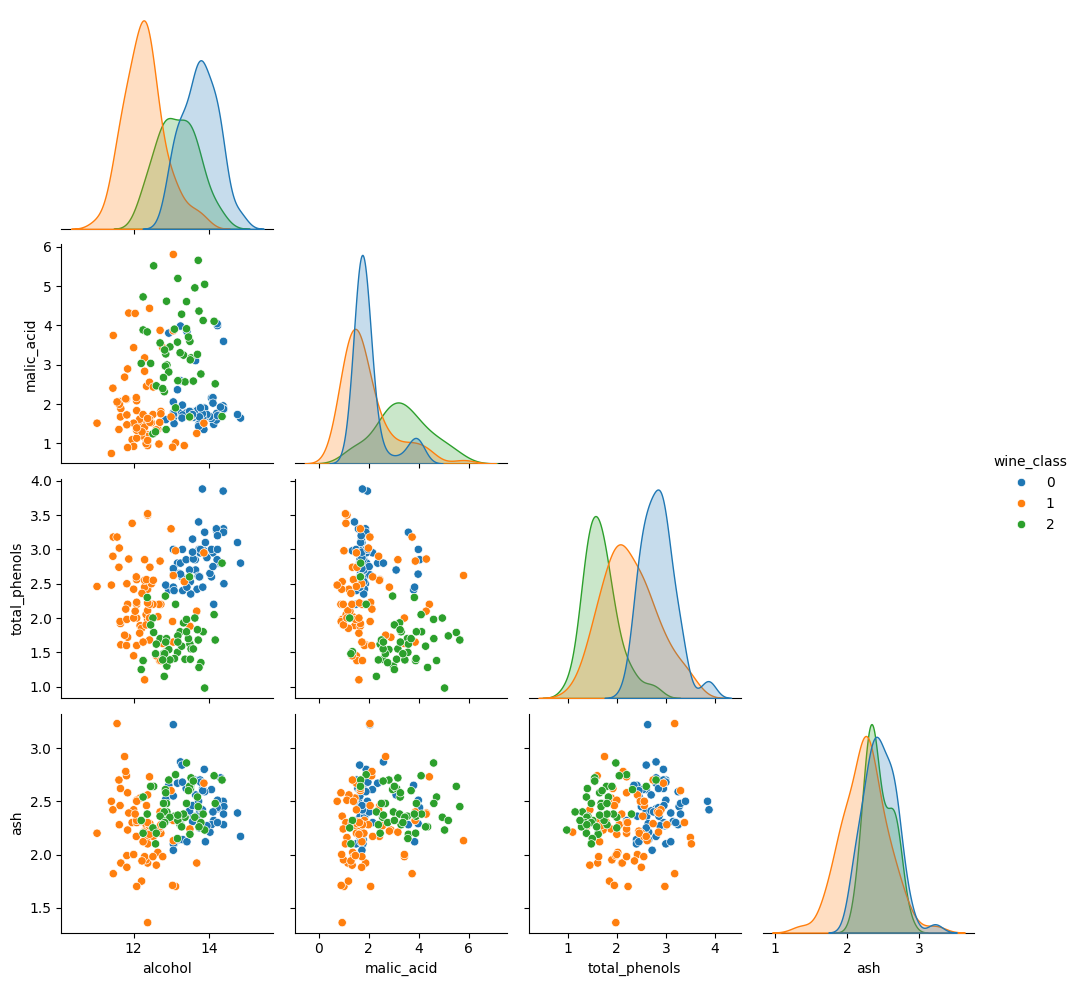

In [31]:
sns.pairplot(data=wine_data[["alcohol", "malic_acid","total_phenols", "ash" ,"wine_class"]], hue="wine_class", corner=True, palette="tab10")

<Axes: >

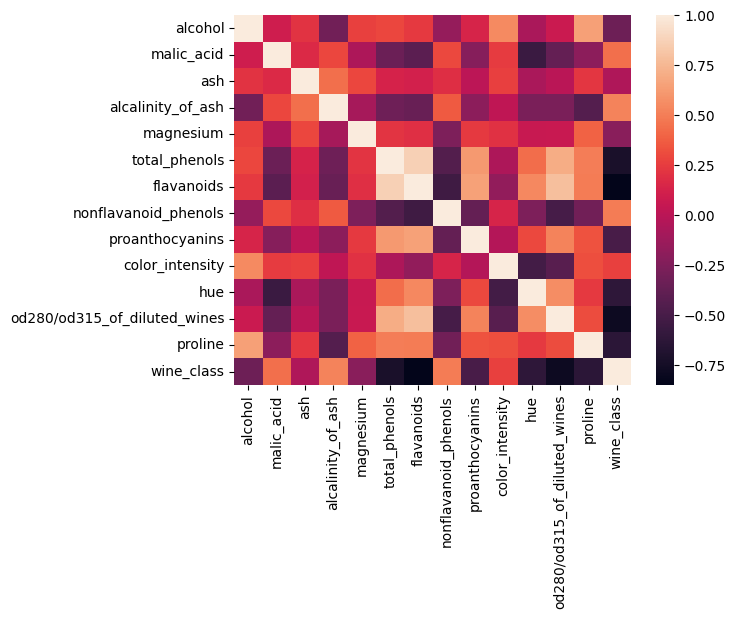

In [32]:
sns.heatmap(wine_data.corr(), annot=False)

Vi vet inte riktigt vad saker betyder här, vad enheterna är här. Så vid skalering kan det vara riskabelt när vi väljer en min max skaler till exemple. 


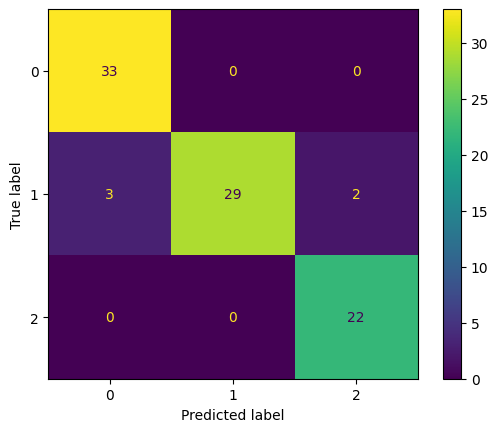

In [33]:
X, y = wine_data.drop("wine_class", axis="columns"), wine_data["wine_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
Scalled_X_train = scaler.fit_transform(X_train)
Scalled_X_test = scaler.transform(X_test)

model_KNN = KNeighborsClassifier()
model_KNN.fit(Scalled_X_train, y_train)
y_pred = model_KNN.predict(Scalled_X_test)

cm = confusion_matrix(y_test, y_pred, labels=model_KNN.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels=model_KNN.classes_)

disp.plot()

# Pipeline and grid search CV

Vi ska an vända cross validation. 



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

scaler = StandardScaler()
pipe_log = Pipeline([("scaler", scaler), ("log", LogisticRegression(
    solver="saga", max_iter=1000, penalty="elasticnet"
))])
pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

param_grid_KNN = {"knn__n_neighbors": list(range(1,50))}
l1_ratio = np.linspace(0,1,20)
param_grid_log = {"log__l1_ratio": l1_ratio}

classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid =param_grid_KNN, cv=5, scoring="accuracy")

classifier_log = GridSearchCV(estimator=pipe_log, param_grid =param_grid_log, cv=5, scoring="accuracy")

classifier_KNN.fit(X_train, y_train)
classifier_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



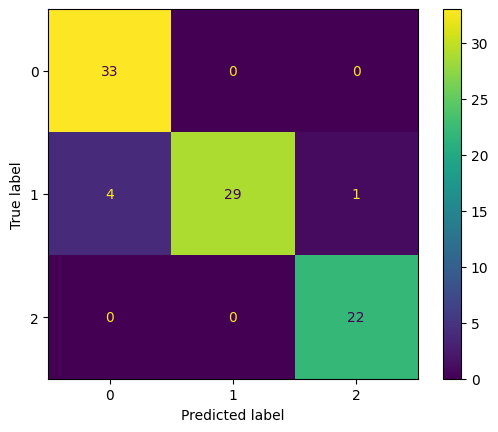

In [40]:
y_pred = classifier_KNN.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model_KNN.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels=model_KNN.classes_)

disp.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



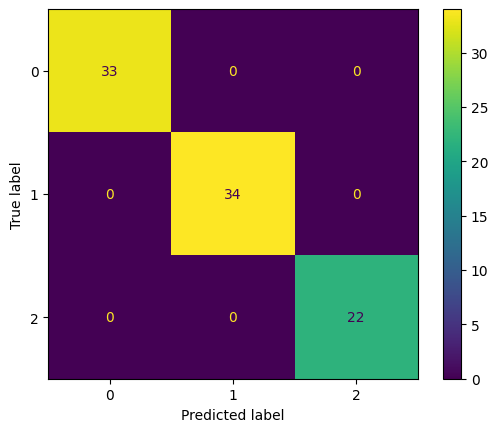

In [41]:
y_pred = classifier_log.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model_KNN.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels=model_KNN.classes_)

disp.plot()